# DAEGU APARTMENT 

### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## Business Problem Understanding

### Context

Daegu merupakan salah satu kota besar di Korea Selatan yang mengalami perkembangan pesat dalam sektor real estate. Permintaan terhadap apartemen di kota ini meningkat seiring bertambahnya populasi dan aktivitas ekonomi di wilayah metropolitan. Data apartemen Daegu ini berisi berbagai karakteristik unit apartemen — seperti ukuran, tipe koridor, jumlah fasilitas, jumlah parkiran, jarak ke stasiun subway, hingga harga jual (SalePrice).

Bagi pengembang properti atau calon pembeli/investor, menentukan harga jual yang wajar dan kompetitif menjadi hal yang sangat penting. Harga yang terlalu tinggi dapat menurunkan minat pembeli, sedangkan harga yang terlalu rendah bisa menyebabkan kerugian bagi pengembang.

Dengan memahami faktor-faktor apa saja yang paling memengaruhi harga jual, para pelaku bisnis dapat membuat keputusan yang lebih rasional dan berbasis data.

### Problem Statement

Salah satu tantangan utama dalam industri properti adalah bagaimana menentukan harga jual yang akurat dan kompetitif berdasarkan karakteristik fisik serta lokasi suatu apartemen.

Namun, hubungan antara fitur-fitur apartemen (seperti ukuran, jumlah fasilitas, jarak ke transportasi umum, dan tipe bangunan) tidak selalu linear dan sering kali sulit diukur secara subjektif.
Tanpa bantuan analisis data, keputusan harga cenderung bergantung pada intuisi atau perbandingan kasar yang belum tentu mencerminkan kondisi pasar sebenarnya.

- Bagi pemilik apartemen, kesalahan dalam menentukan harga dapat membuat unit sulit terjual atau merugikan secara finansial.
- Bagi investor, kemampuan menilai apakah suatu unit underpriced atau overpriced sangat penting untuk strategi investasi.
- Sedangkan bagi developer dan agen properti, pemahaman pola harga membantu menyusun strategi penjualan yang efektif.

Oleh karena itu, diperlukan model machine learning yang mampu memprediksi harga jual apartemen secara objektif dan berbasis data, sehingga semua pihak dapat mengambil keputusan yang lebih tepat.

### Goals

Proyek ini bertujuan untuk:
1. Menganalisis fitur-fitur apartemen di kota Daegu untuk memahami faktor yang paling memengaruhi harga jual (SalePrice).
2. Membangun model prediksi harga menggunakan algoritma regresi (misalnya Linear Regression, Random Forest, atau XGBoost).
3. Menghasilkan alat prediksi harga (price prediction tool) yang dapat membantu pihak developer atau agen dalam 
4. menentukan harga jual properti baru secara objektif dan berbasis data.

Secara bisnis, hasil dari proyek ini dapat memberikan insight berikut:
1. Bagi developer: membantu menentukan harga optimal untuk memaksimalkan keuntungan tanpa kehilangan daya saing.
2. Bagi calon pembeli/investor: membantu mengidentifikasi apartemen yang “underpriced” atau memiliki potensi keuntungan lebih besar.
3. Bagi lembaga keuangan: membantu menilai nilai aset properti dengan lebih akurat untuk kebutuhan kredit atau investasi.

### Analytic Approach
Langkah analisis yang akan dilakukan meliputi:

1. Data Understanding & Cleaning:
Memahami setiap kolom pada dataset (misalnya Size_m2, TimeToSubway, N_FacilitiesInApt, dll), membersihkan nilai yang tidak konsisten, serta mengonversi fitur kategorikal menjadi numerik.

2. Exploratory Data Analysis (EDA):
Menganalisis hubungan antar fitur dan SalePrice, termasuk korelasi dan visualisasi faktor seperti lokasi subway, tipe koridor, dan ukuran apartemen.

3. Feature Engineering:
Membuat fitur tambahan (misalnya konversi waktu ke subway menjadi menit numerik, atau klasifikasi tipe apartemen berdasarkan jumlah fasilitas).

4. Modeling:
Menerapkan beberapa model regresi untuk memprediksi SalePrice, kemudian memilih model terbaik berdasarkan performa di data validasi.

5. Evaluation:
Mengukur performa model menggunakan metrik evaluasi regresi seperti RMSE, MAE, dan MAPE.

### Metric Evaluation
Model akan dievaluasi dengan beberapa metrik berikut:
1. RMSE (Root Mean Squared Error): mengukur rata-rata akar kuadrat dari error prediksi.
2. MAE (Mean Absolute Error): mengukur rata-rata selisih absolut antara nilai aktual dan prediksi.
3. MAPE (Mean Absolute Percentage Error): mengukur rata-rata persentase kesalahan prediksi.

Semakin kecil nilai RMSE, MAE, dan MAPE, maka semakin baik model dalam memprediksi harga.


### ✨ Kesimpulan Singkat (Ringkasan Manfaat Bisnis)
Singkatnya, proyek ini bertujuan membantu pemilik, investor, dan pengembang apartemen di Daegu dalam menentukan harga jual yang adil, akurat, dan kompetitif berbasis data.

### 🏙️ Column Description

| No | Column | Description |
|:--:|:--|:--|
| 0 | HallwayType | Jenis lorong di gedung apartemen (terraced, mix, corridor) |
| 1 | TimeToSubway | Waktu tempuh ke stasiun subway terdekat (misal: 0–5 menit, 10–15 menit) |
| 2 | SubwayStation | Subway terdekat dari apartemen |
| 3 | N_FacilitiesNearBy(ETC) | Jumlah fasilitas umum di sekitar apartemen (toko, restoran, pasar, dll) |
| 4 | N_FacilitiesNearBy(PublicOffice) | Jumlah kantor pemerintahan di sekitar apartemen |
| 5 | N_SchoolNearBy(University) | Jumlah universitas di dekat apartemen |
| 6 | N_Parkinglot(Basement) | Jumlah tempat parkir bawah tanah di gedung apartemen |
| 7 | N_FacilitiesInApt | Jumlah fasilitas di dalam kompleks apartemen (gym, taman, keamanan, dll) |
| 8 | SalePrice | Harga jual apartemen (dalam Won Korea) |
| 9 | TimeToSubway_min | Versi numerik dari waktu ke subway (dalam menit) |
| 10 | Age | Umur bangunan apartemen (dalam tahun) |
| 11 | Size_m2 | Luas unit apartemen (m²) |


In [1]:
# importing all libraries needed

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data = pd.read_csv("/Users/carolineliem/Documents/data-apt/cleaned_daegu_apartment_v2.csv")
data

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,SalePrice,TimeToSubway_min,Age,Size_m2
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,10,346017,2.5,18,128.856461
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,4,150442,12.5,39,84.913342
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,5,61946,17.5,28,51.839874
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,7,165486,7.5,20,84.913342
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,5,311504,2.5,19,161.929929
...,...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,8,323008,2.5,17,84.913342
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,4,242477,17.5,32,134.802253
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,4,168141,17.5,32,163.602183
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,3,73451,7.5,40,62.802428


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   N_FacilitiesInApt                 4123 non-null   int64  
 8   SalePrice                         4123 non-null   int64  
 9   TimeToSubway_min                  4123 non-null   float64
 10  Age                               4123 non-null   int64  
 11  Size_m2                           4123 non-null   float64
dtypes: flo

In [4]:
# calculate unique value for each coloums 
result = []

for col in data.columns:
    result.append({
        'Columns': col,
        'Total Unique Values': data[col].nunique(),
        'Unique Values': data[col].unique()
    })
    
hasil_df = pd.DataFrame(result)

pd.set_option('display.max_colwidth', None)
hasil_df

,Columns,Total Unique Values,Unique Values
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
8,SalePrice,838,"[346017, 150442, 61946, 165486, 311504, 118584, 326548, 143362, 172566, 99823, 211504, 305309, 145132, 209734, 168141, 144752, 389380, 347787, 263345, 207079, 149274, 200000, 85132, 245132, 256637, 207964, 371681, 442477, 435398, 75920, 280530, 163716, 263716, 286725, 138938, 57522, 302654, 391150, 215176, 75221, 476106, 241592, 411504, 123008, 115929, 269026, 348672, 295575, 309292, 77876, 345132, 323893, 198230, 372566, 164601, 109734, 247787, 158407, 126548, 146017, 203539, 161946, 183628, 195575, 331858, 138053, 218584, 380530, 277876, 63274, 258079, 231415, 141150, 250176, 56637, 242035, 432743, 274336, 74256, 84955, 147761, 143389, 130973, 79646, 151327, 295460, 72920, 495575, 89380, 353982, 285840, 228318, 469026, 324778, 243362, 343362, 159292, 265486, 318584, 460176, ...]"
9,TimeToSubway_min,5,"[2.5, 12.5, 17.5, 7.5, 30.0]"


In [5]:
data.duplicated().sum()

np.int64(1422)

In [6]:
data.drop_duplicates(inplace=True)

In [58]:
data

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,SalePrice,TimeToSubway_min,Age,Size_m2
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,10,346017,2.5,18,128.856461
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,4,150442,12.5,39,84.913342
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,5,61946,17.5,28,51.839874
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,7,165486,7.5,20,84.913342
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,5,311504,2.5,19,161.929929
...,...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,5,290265,2.5,19,75.994654
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,4,345132,17.5,32,163.602183
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,8,323008,2.5,17,84.913342
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,4,242477,17.5,32,134.802253


DATA ANALYSIS

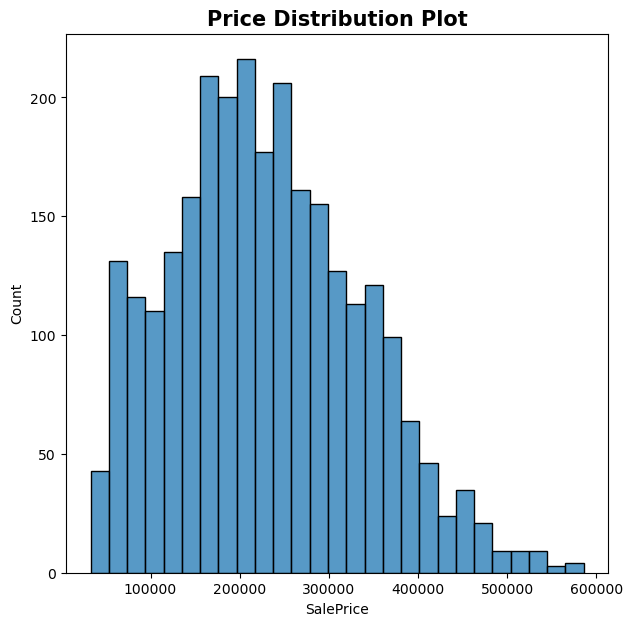

In [7]:
# Plot distribusi fitur 'saleprice'
plt.figure(figsize=(7, 7))
sns.histplot(data['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold');

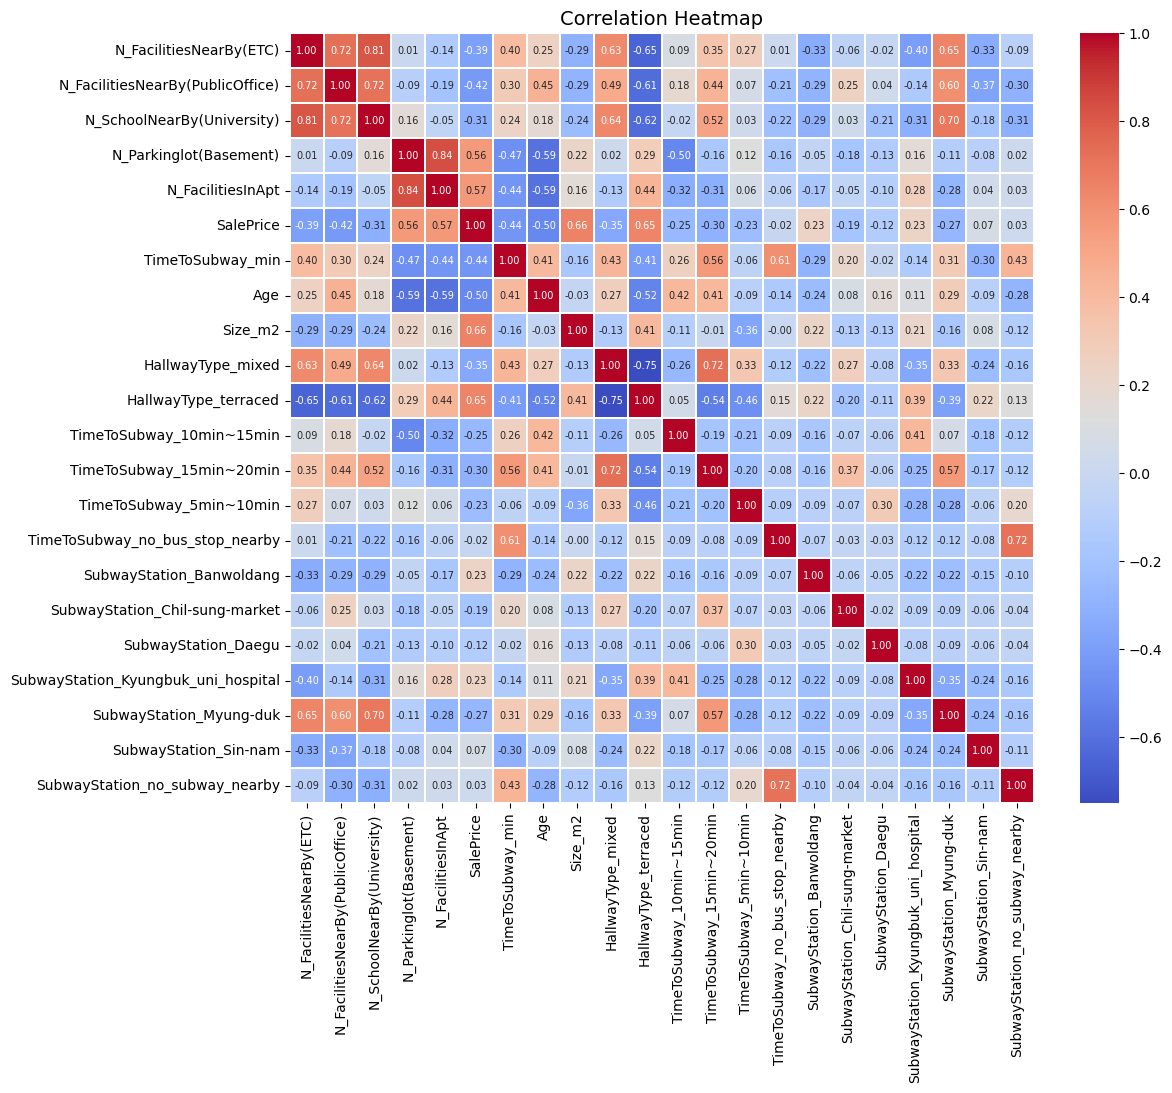

In [8]:
# correlation heatmap between sale price and facility 
data_encoded = pd.get_dummies(data, drop_first=True)
plt.figure(figsize=(12, 10))
sns.heatmap(
    data_encoded.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 7},   # smaller font for clarity
    linewidths=0.3           # optional grid lines between cells
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [9]:
# Detail Top Correlation with Sale Price 
data_encoded = pd.get_dummies(data, drop_first=True)
corr_with_target = data_encoded.corr()["SalePrice"].sort_values(ascending=False)

print("\nTop correlations with SalePrice:\n")
print(corr_with_target)


Top correlations with SalePrice:

SalePrice                              1.000000
Size_m2                                0.655673
HallwayType_terraced                   0.647330
N_FacilitiesInApt                      0.569403
N_Parkinglot(Basement)                 0.557944
SubwayStation_Banwoldang               0.234657
SubwayStation_Kyungbuk_uni_hospital    0.231040
SubwayStation_Sin-nam                  0.074280
SubwayStation_no_subway_nearby         0.025216
TimeToSubway_no_bus_stop_nearby       -0.018093
SubwayStation_Daegu                   -0.123579
SubwayStation_Chil-sung-market        -0.188958
TimeToSubway_5min~10min               -0.232355
TimeToSubway_10min~15min              -0.251978
SubwayStation_Myung-duk               -0.270279
TimeToSubway_15min~20min              -0.296395
N_SchoolNearBy(University)            -0.308612
HallwayType_mixed                     -0.347834
N_FacilitiesNearBy(ETC)               -0.393809
N_FacilitiesNearBy(PublicOffice)      -0.420233
TimeT

**Dari hasil korelasi dengan SalePrice, terlihat bahwa:**
- Ukuran apartemen (Size_m2) memiliki korelasi positif tertinggi dengan harga. Semakin besar ukuran unit, semakin tinggi harga jualnya.
- Tipe koridor “terraced” dan jumlah fasilitas di dalam apartemen juga berhubungan positif — artinya apartemen dengan fasilitas lebih lengkap dan desain koridor yang lebih baik cenderung lebih mahal.
- Jumlah parkiran basement ikut meningkatkan nilai properti, karena kenyamanan parkir menjadi faktor penting bagi pembeli.
- Sebaliknya, jarak ke stasiun subway (TimeToSubway_min) dan usia bangunan (Age) memiliki korelasi negatif yang kuat. Semakin jauh dari transportasi publik dan semakin tua bangunannya, semakin rendah harga jualnya.
- Beberapa fitur lokasi seperti jumlah fasilitas publik terdekat dan tipe hallway campuran (mixed) juga cenderung menurunkan nilai harga.

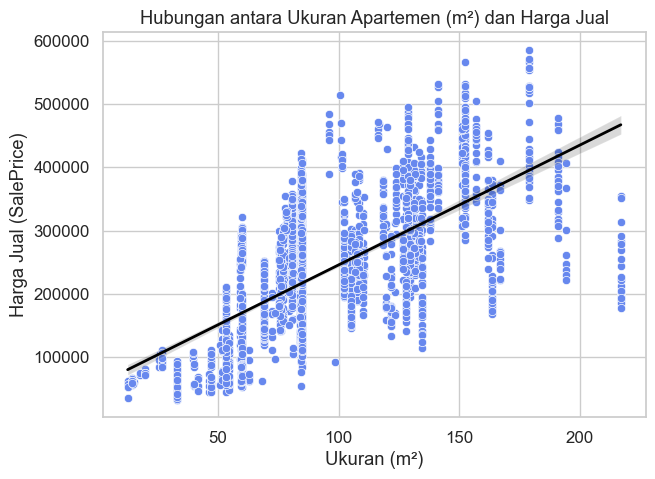

In [10]:
# Set style for all plots
sns.set(style="whitegrid", palette="coolwarm", font_scale=1.1)

# --- SalePrice vs Size_m2 --- corr(0.65)
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="Size_m2", y="SalePrice")
sns.regplot(data=data, x="Size_m2", y="SalePrice", scatter=False, color="black", line_kws={"lw":2})
plt.title("Hubungan antara Ukuran Apartemen (m²) dan Harga Jual")
plt.xlabel("Ukuran (m²)")
plt.ylabel("Harga Jual (SalePrice)")
plt.show()

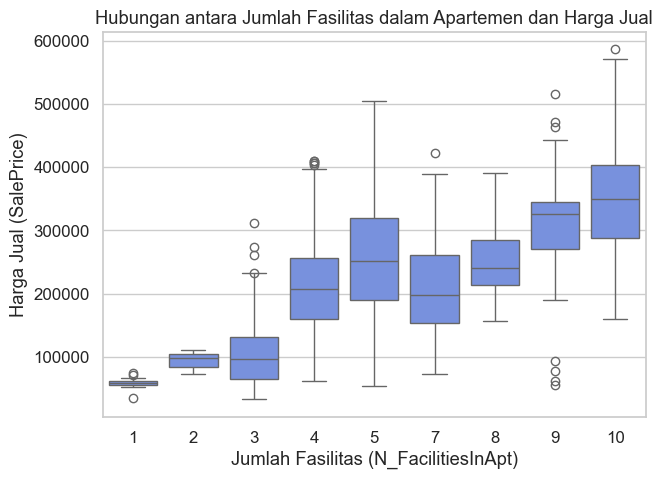

In [11]:
# --- 2️⃣ SalePrice vs N_FacilitiesInApt ---
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x="N_FacilitiesInApt", y="SalePrice")
plt.title("Hubungan antara Jumlah Fasilitas dalam Apartemen dan Harga Jual")
plt.xlabel("Jumlah Fasilitas (N_FacilitiesInApt)")
plt.ylabel("Harga Jual (SalePrice)")
plt.show()

Grafik diatas menunjukkan bahwa semakin banyak jumlah fasilitas yang tersedia dalam apartemen (N_FacilitiesInApt), maka semakin tinggi pula harga jual nya. 

Fasilitas dalam apartemen — seperti gym, taman bermain, ruang serbaguna, atau sistem keamanan — mencerminkan kualitas hidup dan kenyamanan penghuni.

- Apartemen dengan lebih banyak fasilitas biasanya dikategorikan sebagai kompleks premium, sehingga memiliki nilai jual lebih tinggi.
- Apartemen dengan fasilitas terbatas cenderung lebih ekonomis dan ditujukan untuk pasar menengah ke bawah.

Dengan demikian, jumlah fasilitas merupakan salah satu faktor penting yang berkontribusi terhadap peningkatan harga jual apartemen.

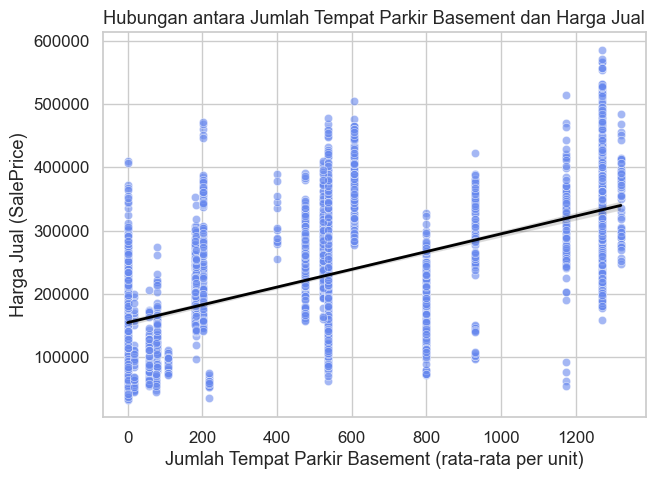

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="N_Parkinglot(Basement)", y="SalePrice", alpha=0.6)
sns.regplot(data=data, x="N_Parkinglot(Basement)", y="SalePrice",
            scatter=False, color="black", line_kws={"lw":2})
plt.title("Hubungan antara Jumlah Tempat Parkir Basement dan Harga Jual")
plt.xlabel("Jumlah Tempat Parkir Basement (rata-rata per unit)")
plt.ylabel("Harga Jual (SalePrice)")
plt.show()

Berdasarkan visualisasi diatas, terlihat bahwa apartemen dengan jumlah tempat parkir basement yang lebih banyak cenderung memiliki harga jual yang lebih tinggi.

Apartemen dengan jumlah tempat parkir yang lebih banyak biasanya berada di gedung yang lebih besar, berkelas, atau berlokasi strategis.
Sebaliknya, apartemen dengan parkir terbatas cenderung ditujukan untuk segmen pasar menengah ke bawah.

Pola ini menunjukkan bahwa fasilitas parkir berperan sebagai faktor penambah nilai properti, terutama di kota padat seperti Daegu, di mana lahan parkir menjadi kebutuhan penting bagi penghuni.

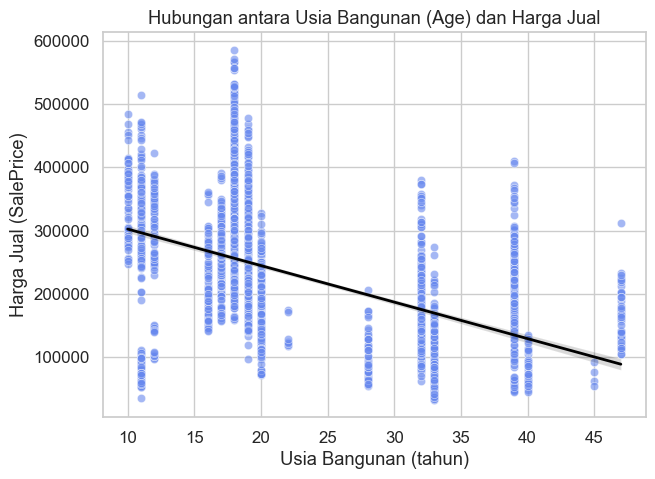

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="Age", y="SalePrice", alpha=0.6)
sns.regplot(data=data, x="Age", y="SalePrice", scatter=False, color="black", line_kws={"lw":2})
plt.title("Hubungan antara Usia Bangunan (Age) dan Harga Jual")
plt.xlabel("Usia Bangunan (tahun)")
plt.ylabel("Harga Jual (SalePrice)")
plt.show()


Berdasarkan grafik, terlihat adanya korelasi negatif antara usia bangunan dan harga jual apartemen.
Semakin tua usia bangunan (Age), maka harga jual cenderung menurun

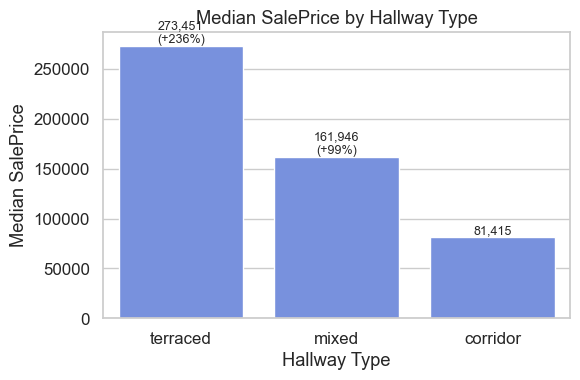

In [14]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="HallwayType", y="SalePrice", data=data, estimator=np.median, ci=None)
plt.title("Median SalePrice by Hallway Type")
plt.xlabel("Hallway Type")
plt.ylabel("Median SalePrice")

# Add value and % difference annotations
base = ax.patches[-1].get_height()  # corridor as baseline (last bar)
for p in ax.patches:
    height = p.get_height()
    diff = (height/base - 1)*100
    ax.annotate(f'{height:,.0f}\n(+{diff:.0f}%)' if diff>0 else f'{height:,.0f}',
                (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Dari grafik di atas, terlihat bahwa apartemen dengan tipe hallway terraced memiliki harga jual median paling tinggi, yaitu sekitar 273 juta won, sedangkan tipe corridor memiliki harga median paling rendah, hanya sekitar 81 juta won.

Dari sini terlihat bahwa apartemen dengan desain hallway bertipe terraced memiliki median harga jual hampir 3 x lipat dibandingkan tipe corridor.

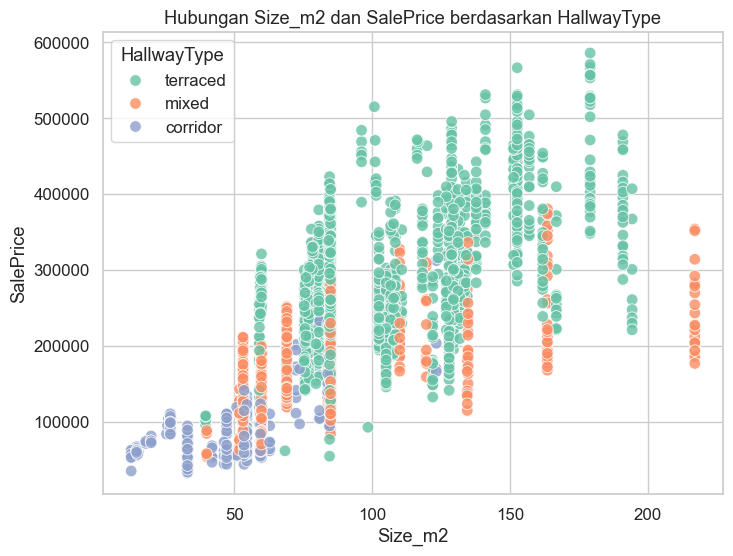

In [15]:
# Identify which apartment characteristics add the most value
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x='Size_m2',
    y='SalePrice',
    hue='HallwayType',
    palette='Set2',       # try: 'Set1', 'Set2', 'Set3', 'Dark2', 'tab10'
    s=70, alpha=0.8
)
plt.title("Hubungan Size_m2 dan SalePrice berdasarkan HallwayType")
plt.show()


Korelasi kuat antara desain hallway, size dan segmen pasar.
- Apartemen tipe terraced umumnya ditemukan di unit besar dan mahal — cocok untuk segmen premium atau keluarga mapan.
- Corridor dan mixed lebih banyak pada unit kecil hingga menengah, yang cenderung ditujukan untuk segmen pembeli kelas menengah atau investor sewa.

In [16]:
# --- Pivot by TimeToSubway ---
pivot_time = pd.pivot_table(
    data=data,
    index='TimeToSubway',
    values='SalePrice',
    aggfunc=['mean', 'count', 'sum']
)

# Clean column names
pivot_time.columns = ['Average_Price', 'Total_Units', 'Total_Sales']

# Add share columns
pivot_time['Sales_Share(%)'] = pivot_time['Total_Sales'] / pivot_time['Total_Sales'].sum() * 100
pivot_time['Unit_Share(%)'] = pivot_time['Total_Units'] / pivot_time['Total_Units'].sum() * 100

# Sort by Average_Price descending
pivot_time = pivot_time.sort_values(by='Average_Price', ascending=False)

# Display
pivot_time


,Average_Price,Total_Units,Total_Sales,Sales_Share(%),Unit_Share(%)
TimeToSubway,,,,,
0-5min,296238.779647,1248,369705997,59.638638,46.205109
no_bus_stop_nearby,219816.960000,100,21981696,3.545948,3.702332
5min~10min,178356.964072,501,89356839,14.414481,18.548686
10min~15min,169007.610599,434,73349303,11.832247,16.068123
15min~20min,156737.712919,418,65516364,10.568686,15.475750


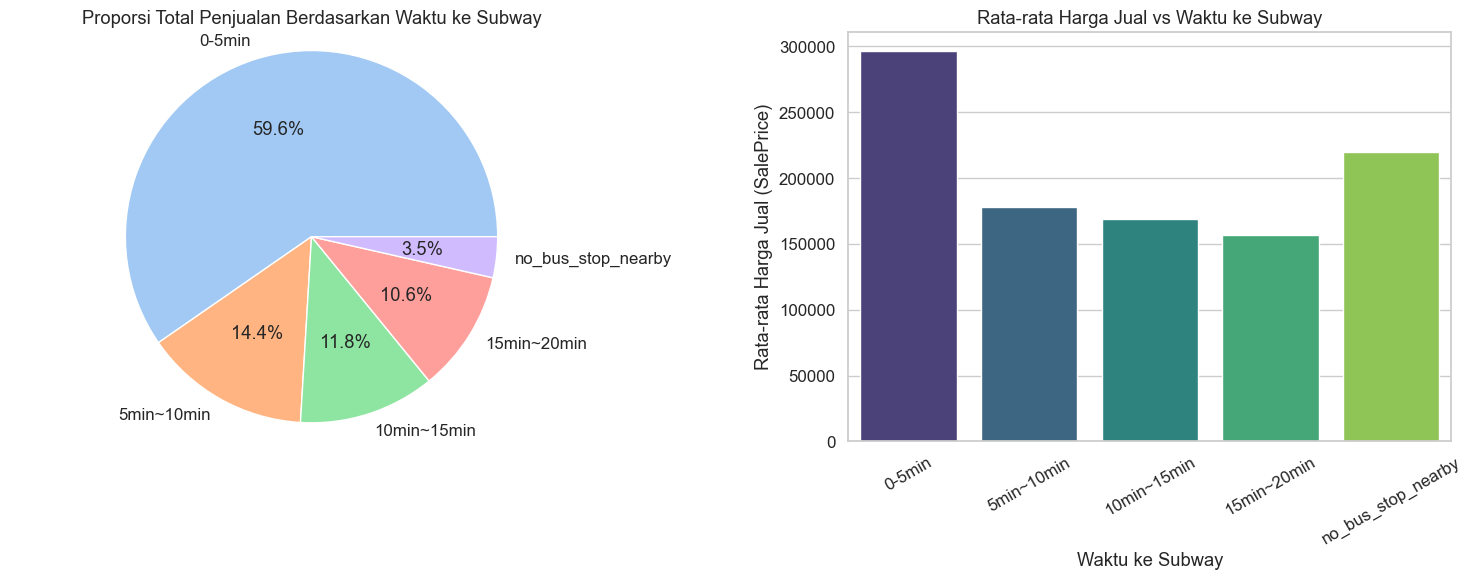

In [17]:
# --- Pivot summary by TimeToSubway ---
pivot_subway = pd.pivot_table(
    data=data,
    index='TimeToSubway',
    values='SalePrice',
    aggfunc=['sum', 'count']
)

pivot_subway.columns = ['Total Sales', 'Total Unit']
pivot_subway['Proporsi Sales by Sales (%)'] = pivot_subway['Total Sales'] / pivot_subway['Total Sales'].sum() * 100
pivot_subway['Proporsi Sales by Unit (%)'] = pivot_subway['Total Unit'] / pivot_subway['Total Unit'].sum() * 100
pivot_subway['Avg_SalePrice'] = pivot_subway['Total Sales'] / pivot_subway['Total Unit']
pivot_subway = pivot_subway.sort_values('Proporsi Sales by Sales (%)', ascending=False)

# --- Create side-by-side layout ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- (A) Pie Chart: Share of Total Sales ---
axes[0].pie(
    pivot_subway['Proporsi Sales by Sales (%)'],
    labels=pivot_subway.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("pastel", len(pivot_subway.index))
)
axes[0].set_title('Proporsi Total Penjualan Berdasarkan Waktu ke Subway')
axes[0].axis('equal')

# --- (B) Bar Chart: Average Sale Price ---
sns.barplot(
    data=pivot_subway,
    x=pivot_subway.index,
    y='Avg_SalePrice',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Rata-rata Harga Jual vs Waktu ke Subway')
axes[1].set_xlabel('Waktu ke Subway')
axes[1].set_ylabel('Rata-rata Harga Jual (SalePrice)')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


Secara umum, semakin dekat dengan stasiun subway → harga apartemen cenderung lebih tinggi.

Ini memperkuat hipotesis bahwa aksesibilitas transportasi publik meningkatkan nilai properti.

Namun, pengecualian seperti “no_bus_stop_nearby” menunjukkan bahwa harga properti juga dipengaruhi oleh faktor lain seperti luas bangunan, fasilitas premium, atau lokasi di area eksklusif meski jauh dari subway.

<Axes: ylabel='SubwayStation'>

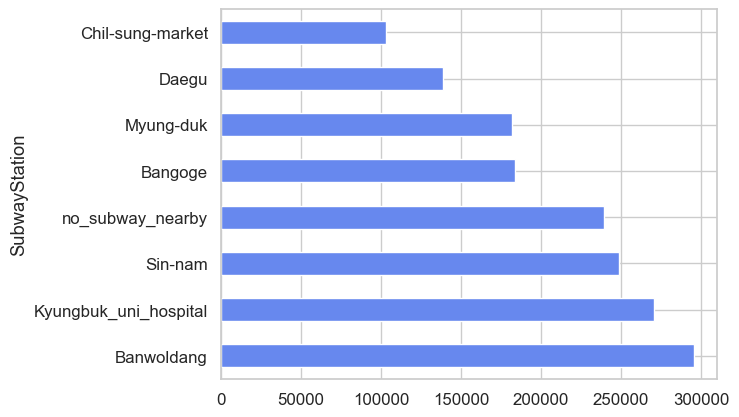

In [18]:
# Show how location and commute convenience affect property price.

subway_pivot = data.groupby('SubwayStation')['SalePrice'].mean().sort_values(ascending=False)
subway_pivot.plot(kind='barh')

In [19]:
# --- Pivot by SubwayStation ---
pivot_station = pd.pivot_table(
    data=data,
    index='SubwayStation',
    values='SalePrice',
    aggfunc=['mean', 'count', 'sum']
)

# Clean up the column names
pivot_station.columns = ['Average_Price', 'Total_Units', 'Total_Sales']

# Add percentage share columns
pivot_station['Sales_Share(%)'] = pivot_station['Total_Sales'] / pivot_station['Total_Sales'].sum() * 100
pivot_station['Unit_Share(%)'] = pivot_station['Total_Units'] / pivot_station['Total_Units'].sum() * 100

# Sort by Average Price descending
pivot_station = pivot_station.sort_values(by='Average_Price', ascending=False)

# Display
pivot_station.head(10)

,Average_Price,Total_Units,Total_Sales,Sales_Share(%),Unit_Share(%)
SubwayStation,,,,,
Banwoldang,295253.195195,333,98319314,15.860251,12.328767
Kyungbuk_uni_hospital,270869.671965,692,187441813,30.236930,25.620141
Sin-nam,248798.073684,380,94543268,15.251123,14.068863
no_subway_nearby,239197.287234,188,44969090,7.254130,6.960385
Bangoge,183832.289286,280,51473041,8.303306,10.366531
Myung-duk,181915.097320,709,128977804,20.805885,26.249537
Daegu,138611.388889,54,7485015,1.207435,1.999260
Chil-sung-market,103090.061538,65,6700854,1.080939,2.406516


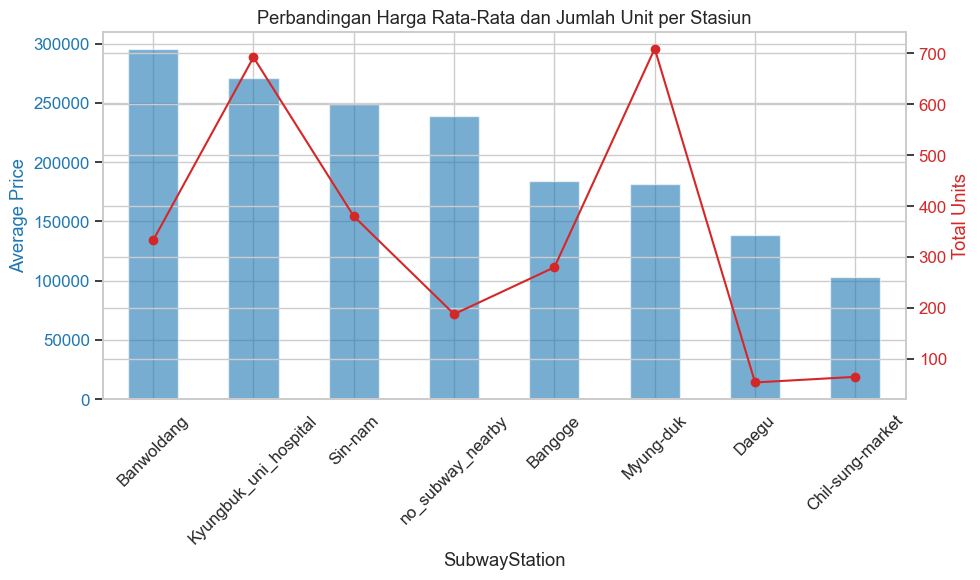

In [20]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar for Average Price
color = 'tab:blue'
ax1.set_xlabel('Subway Station')
ax1.set_ylabel('Average Price', color=color)
pivot_station['Average_Price'].plot(kind='bar', color=color, ax=ax1, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(pivot_station.index, rotation=45)

# Line for Total Units
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Units', color=color)
pivot_station['Total_Units'].plot(kind='line', color=color, marker='o', ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Perbandingan Harga Rata-Rata dan Jumlah Unit per Stasiun')
plt.tight_layout()
plt.show()

**Bar chart (biru)** menunjukkan rata-rata harga jual (Average Price) apartemen di sekitar setiap stasiun subway.

**Line chart (merah)** menunjukkan jumlah unit yang terjual (Total Units) di setiap stasiun.

- Stasiun Banwoldang dan Kyungbuk University Hospital adalah lokasi paling strategis — gabungan antara harga tinggi dan volume penjualan besar.
- Daegu dan Chil-sung-market adalah area dengan aktivitas penjualan rendah dan harga yang lebih murah.
- Secara keseluruhan, akses ke stasiun subway besar (pusat kota atau area universitas) masih menjadi faktor kunci dalam menentukan nilai dan daya tarik apartemen di Daegu



In [21]:
# Which subway stations and distance ranges produce the highest average SalePrice?
# --- Combined Pivot (SubwayStation + TimeToSubway) ---
pivot_combo = pd.pivot_table(
    data=data,
    index=['SubwayStation', 'TimeToSubway'],
    values='SalePrice',
    aggfunc=['mean', 'count', 'sum']
)

# Clean up
pivot_combo.columns = ['Average_Price', 'Total_Units', 'Total_Sales']
pivot_combo = pivot_combo.sort_values(by='Average_Price', ascending=False)

pivot_combo.head(10)


Average_Price  Total_Units  \
SubwayStation         TimeToSubway                                     
Banwoldang            0-5min              316577.877076          301   
Kyungbuk_uni_hospital 0-5min              311885.378109          402   
Myung-duk             0-5min              277721.141509          212   
Sin-nam               0-5min              270754.510511          333   
no_subway_nearby      5min~10min          261220.386364           88   
                      no_bus_stop_nearby  219816.960000          100   
Kyungbuk_uni_hospital 10min~15min         214013.417241          290   
Bangoge               5min~10min          183832.289286          280   
Myung-duk             15min~20min         166616.175637          353   
Daegu                 5min~10min          138611.388889           54   

                                          Total_Sales  
SubwayStation         TimeToSubway                     
Banwoldang            0-5min                 95289941  
Kyungbuk_uni_hospital 0-5min                125377922  
Myung-duk             0-5min                 58876882  
Sin-nam               0-5min                 90161252  
no_subway_nearby      5min~10min             22987394  
                      no_bus_stop_nearby     21981696  
Kyungbuk_uni_hospital 10min~15min            62063891  
Bangoge               5min~10min             51473041  
Myung-duk             15min~20min            58815510  
Daegu                 5min~10min              7485015

Ringkasan gabungan antara subway station, time to subway dan sale price. Dengan ini terlihat top 4 average price tertinggi diduduki oleh 0-5min dengan subway station yang berbeda. 
Ada outlier menarik seperti no_subway_nearby, yang walau jauh dari subway, tetap punya nilai jual tinggi — Kemungkinan disebabkan oleh faktor lain seperti luas apartemen lebih besar, fasilitas lebih lengkap, atau berada di kawasan elit

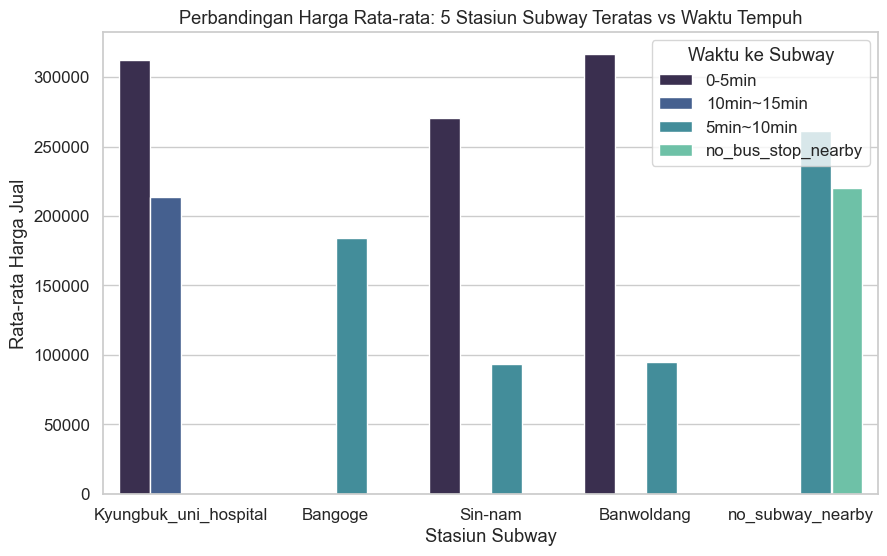

In [22]:
top_stations = data[data['SubwayStation'].isin(pivot_station.head(5).index)]
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_stations,
    x='SubwayStation', y='SalePrice', hue='TimeToSubway',
    estimator='mean', ci=None, palette='mako'
)
plt.title("Perbandingan Harga Rata-rata: 5 Stasiun Subway Teratas vs Waktu Tempuh")
plt.ylabel("Rata-rata Harga Jual")
plt.xlabel("Stasiun Subway")
plt.legend(title="Waktu ke Subway")
plt.show()



### IMPORT & CONFIGURASI UMUM

In [23]:
from __future__ import annotations
import os

# Sklearn & ML
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Menyimpan artefak
import joblib

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("sklearn:", sklearn.__version__)


sklearn: 1.6.1


**Konfigurasi analitik/diagnostik**

In [24]:
NUM_ONLY = True                  # hanya numerik untuk cek skew/corr
SKEW_THRESH = 0.75               # ambang skewness untuk saran transformasi log
POSITIVE_RATIO_FOR_LOG = 0.95    # min. proporsi nilai > 0 agar aman log
CORR_THRESH = 0.90               # flag pasangan fitur yang sangat berkorelasi
EXCLUDE_COLS_FROM_CHECK = {"SalePrice"}  # exclude target dari corr/VIF
USE_LOG_TARGET = True            # pakai log target (stabilkan distribusi)
TEST_SIZE = 0.2
CV_SPLITS = 5

**Duplicate Data**

In [25]:
# Duplikasi agar aman
try:
    df = data.copy()
except NameError:
    raise RuntimeError("Variabel `data` tidak ditemukan. Load dataset ke variabel `data` terlebih dahulu.")

**Audit Data**

In [26]:
print("\n===== INFO DATA (ringkas) =====")
print(df.info())
print("\nDuplikat baris:", df.duplicated().sum())

# Statistik numerik
num_features_all = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nFitur numerik (awal):", len(num_features_all))
print(pd.DataFrame(df[num_features_all].describe().T).round(2).head())

# Cek missing value
print("\nMissing values per kolom:")
print(df.isna().sum().sort_values(ascending=False).head(20))


===== INFO DATA (ringkas) =====
<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   N_FacilitiesInApt                 2701 non-null   int64  
 8   SalePrice                         2701 non-null   int64  
 9   TimeToSubway_min                  2701 non-null   float64
 10  Age                               2701 non-null   int64  
 11  Size_m2                           2701 no

Dataset ini sudah bersih dan siap digunakan untuk analisis atau pemodelan machine learning.

**FEATURE CHECK: kolom penting tersedia**

In [27]:
expected_cols = ["SalePrice", "TimeToSubway_min", "Size_m2", "Age"]
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    print("\n⚠️ Peringatan: kolom penting hilang:", missing)
else:
    print("\nKolom kunci lengkap ✔:", expected_cols)


Kolom kunci lengkap ✔: ['SalePrice', 'TimeToSubway_min', 'Size_m2', 'Age']


**CEK SKEWNESS + SARAN TRANSFORMASI (num only)**

In [28]:
from IPython.display import display, Markdown
num_cols = df.select_dtypes(include=[np.number]).columns.tolist() if NUM_ONLY else df.columns.tolist()
num_cols = [c for c in num_cols if c not in EXCLUDE_COLS_FROM_CHECK]

skew_rows = []
for c in num_cols:
    s = pd.to_numeric(df[c], errors="coerce").dropna()
    if s.empty:
        continue
    skew_val = s.skew()
    min_val = s.min()
    non_positive_ratio = (s <= 0).mean()
    all_positive = (non_positive_ratio == 0.0)

    suggest_log = False
    note = ""
    if skew_val > SKEW_THRESH:
        if (1 - non_positive_ratio) >= POSITIVE_RATIO_FOR_LOG:
            suggest_log = True
            if not all_positive:
                shift = 1 - min_val if min_val <= 0 else 0
                note = f"log1p dengan shift={shift:.6g}"
            else:
                note = "log1p"
        else:
            note = "skewed tapi banyak nilai <=0; coba Box-Cox/Yeo-Johnson"
    else:
        note = "tidak perlu transform"

    skew_rows.append({
        "column": c,
        "skewness": round(skew_val, 3),
        "min": round(min_val, 6),
        "pct_non_positive": round(non_positive_ratio * 100, 2),
        "suggest_log": suggest_log,
        "catatan": note
    })

skew_table = pd.DataFrame(skew_rows).sort_values("skewness", ascending=False).reset_index(drop=True)
# print("\n📦 Skewness & Saran Transformasi (Top 15):")
# print(skew_table.head(15))

# Helper: terapkan log1p aman (dengan shift jika perlu)
def apply_log1p_safe(df_in: pd.DataFrame, cols: list[str]):
    out = df_in.copy()
    shifts = {}
    for c in cols:
        s = pd.to_numeric(out[c], errors="coerce")
        if s.isna().all():
            continue
        min_val = s.min()
        shift = 1 - min_val if min_val <= 0 else 0
        shifts[c] = shift
        out[c] = np.log1p(s + shift)
    return out, shifts

# # Contoh: kandidat transform (berdasar tabel di atas)
# log_candidates = skew_table.query("suggest_log == True")["column"].tolist()
# print("\nKandidat log transform:", log_candidates[:10])

# MEMPERCANTIK VISUALISASI 
# 1) Add friendly columns for display
disp = (
    skew_table
      .assign(
          **{
              "% non-positive": skew_table["pct_non_positive"].map(lambda x: f"{x:.2f}%"),
              "Suggest transform": np.where(skew_table["suggest_log"], "✅ Yes", "❌ No"),
              "Suggested method": np.where(skew_table["suggest_log"], "`log1p`", "—")
          }
      )
      .rename(columns={
          "column": "Column",
          "skewness": "Skewness",
          "min": "Min"
      })[
          ["Column", "Skewness", "Min", "% non-positive", "Suggest transform", "Suggested method", "catatan"]
      ]
      .head(15)
)

# 2) Create a neat, GitHub-like style
def _table_styles():
    border = "1px solid #d0d7de"
    return [
        {"selector": "th", "props": [("padding", "8px 10px"), ("border-bottom", border), ("background", "#f6f8fa"), ("text-align", "left")]},
        {"selector": "td", "props": [("padding", "6px 10px"), ("border-bottom", border)]},
        {"selector": "tr:last-child td", "props": [("border-bottom", "none")]},
        {"selector": "table", "props": [("border-collapse", "collapse"), ("border", border), ("border-radius", "6px"), ("overflow", "hidden")]}
    ]

# 3) Highlight rows that exceed your skew threshold
def highlight_skew(s):
    return ["font-weight: 600; color: #0b5ed7;" if v >= SKEW_THRESH and s.name == "Skewness" else "" for v in s]

styled = (
    disp.style
        .format({"Skewness": "{:.3f}", "Min": "{:.2f}"})
        .hide(axis="index")
        .set_table_styles(_table_styles())
        .apply(highlight_skew, subset=["Skewness"])
        .set_properties(subset=["Skewness", "Min", "% non-positive"], **{"text-align": "right"})
        .set_properties(subset=["Column", "Suggest transform", "Suggested method", "catatan"], **{"text-align": "left"})
)

display(Markdown("### 📦 Skewness & Transform Suggestions"))
display(styled)

# Contoh: kandidat transform (berdasar tabel di atas)
log_candidates = skew_table.query("suggest_log == True")["column"].tolist()
print("\nKandidat log transform:", log_candidates[:10])

### 📦 Skewness & Transform Suggestions

Column,Skewness,Min,% non-positive,Suggest transform,Suggested method,catatan
TimeToSubway_min,1.194,2.50,0.00%,✅ Yes,`log1p`,log1p
Size_m2,0.851,12.54,0.00%,✅ Yes,`log1p`,log1p
Age,0.766,10.00,0.00%,✅ Yes,`log1p`,log1p
N_FacilitiesNearBy(ETC),0.628,0.00,42.24%,❌ No,—,tidak perlu transform
N_FacilitiesInApt,0.548,1.00,0.00%,❌ No,—,tidak perlu transform
N_Parkinglot(Basement),0.437,0.00,13.14%,❌ No,—,tidak perlu transform
N_SchoolNearBy(University),0.377,0.00,2.55%,❌ No,—,tidak perlu transform
N_FacilitiesNearBy(PublicOffice),-0.037,0.00,1.04%,❌ No,—,tidak perlu transform



Kandidat log transform: ['TimeToSubway_min', 'Size_m2', 'Age']


artinya tiga kolom ini (TimeToSubway_min', 'Size_m2', 'Age')
datanya miring ke kanan (banyak nilai kecil dan sedikit nilai besar), sehingga perlu dilogaritmakan agar lebih seimbang.

In [29]:
# Pastikan tidak dobel
log_cols_existing = [c for c in df.columns if c in ("log_TimeToSubway_min","log_Size_m2","log_Age")]
if log_cols_existing:
    df = df.drop(columns=log_cols_existing)

for col in ["TimeToSubway_min", "Size_m2", "Age"]:
    if col in df.columns:
        df[f"log_{col}"] = np.log1p(df[col])

In [31]:
try:
    corr = df[[c for c in num_cols if c in df.columns]].corr(numeric_only=True).abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    pairs = (
        upper.stack().reset_index().rename(columns={"level_0":"feature_1","level_1":"feature_2",0:"abs_corr"})
        .sort_values("abs_corr", ascending=False)
    )
    high_corr_pairs = pairs[pairs["abs_corr"] >= CORR_THRESH].reset_index(drop=True)
    print(f"\n🔗 Pasangan fitur berkorelasi tinggi (|ρ| ≥ {CORR_THRESH}):")
    print(high_corr_pairs.head(20))
except Exception as e:
    print("\n(Info: gagal hitung korelasi)", e)

# VIF (hanya relevan utk linear model)
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    Xv = df[[c for c in num_cols if c in df.columns]].dropna()
    if Xv.shape[0] > Xv.shape[1] and Xv.shape[1] >= 2:
        vif_df = pd.DataFrame({
            "feature": Xv.columns,
            "VIF": [variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])]
        }).sort_values("VIF", ascending=False).reset_index(drop=True)
        print("\n🧮 VIF (drop fitur dengan VIF > 10 jika pakai linear):")
        print(vif_df.head(15))
    else:
        print("\n(ℹ️ VIF dilewati: baris/kolom kurang atau matriks singular)")
except Exception as e:
    print("\n(ℹ️ VIF tidak dihitung. Install statsmodels jika perlu)")
    print("Alasan:", e)


🔗 Pasangan fitur berkorelasi tinggi (|ρ| ≥ 0.9):
Empty DataFrame
Columns: [feature_1, feature_2, abs_corr]
Index: []

🧮 VIF (drop fitur dengan VIF > 10 jika pakai linear):
                            feature        VIF
0                 N_FacilitiesInApt  17.261849
1  N_FacilitiesNearBy(PublicOffice)  16.802474
2        N_SchoolNearBy(University)  15.205016
3            N_Parkinglot(Basement)  13.311337
4                               Age  13.180535
5                           Size_m2   8.310737
6           N_FacilitiesNearBy(ETC)   6.359765
7                  TimeToSubway_min   3.776008


Tabel ini menunjukkan tingkat multikolinearitas antar fitur numerik.
Nilai VIF mengukur seberapa besar sebuah fitur bisa “dijelaskan” oleh fitur lainnya.
Semakin tinggi nilainya → semakin besar redundansinya (artinya fitur itu mirip dengan fitur lain).

Model Linear Regression bisa menjadi tidak stabil kalau menggunakan fitur dengan VIF > 10, karena fitur-fitur itu memberikan informasi yang sangat mirip satu sama lain.
→ Solusinya: drop atau gabungkan fitur-fitur tersebut.

Model Tree-Based (Random Forest, XGBoost) tidak terlalu terpengaruh oleh multikolinearitas, jadi tidak perlu hapus fitur kalau pakai model pohon.

DEFINISI TARGET & FITUR

In [33]:
# Target
y = np.log1p(df["SalePrice"]).rename("SalePrice_log") if USE_LOG_TARGET else df["SalePrice"].copy()

# Versi fitur untuk model pohon: drop hanya target
X_tree = df.drop(columns=["SalePrice"], errors="ignore")

# Versi fitur untuk model linear: prefer log_* untuk variabel skew
linear_keep = []
for c in df.columns:
    if c in ["TimeToSubway_min","Size_m2","Age"] and f"log_{c}" in df.columns:
        linear_keep.append(f"log_{c}")
    elif c != "SalePrice":
        linear_keep.append(c)
X_linear = df[linear_keep].copy()

# Pastikan tidak ada duplikasi nama kolom
def ensure_unique_cols(dfin: pd.DataFrame) -> pd.DataFrame:
    if dfin.columns.duplicated().any():
        dups = dfin.columns[dfin.columns.duplicated()].tolist()
        print("⚠️ Duplikat kolom dihapus:", dups)
        dfin = dfin.loc[:, ~dfin.columns.duplicated()]
    return dfin

X_tree  = ensure_unique_cols(X_tree)
X_linear = ensure_unique_cols(X_linear)

# Daftar tipe
num_cols_tree = X_tree.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_tree = X_tree.select_dtypes(include=["object","category"]).columns.tolist()
num_cols_linear = X_linear.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_linear = X_linear.select_dtypes(include=["object","category"]).columns.tolist()

⚠️ Duplikat kolom dihapus: ['log_TimeToSubway_min', 'log_Size_m2', 'log_Age']


### PREPROCESSOR (NUM & CATEGORIK)

In [34]:
num_tf_linear = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

pre_linear = ColumnTransformer([
    ("num", num_tf_linear, num_cols_linear),
    ("cat", cat_tf, cat_cols_linear),
])

num_tf_tree = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

pre_tree = ColumnTransformer([
    ("num", num_tf_tree, num_cols_tree),
    ("cat", cat_tf, cat_cols_tree),
])

### MODEL & SCORING

In [35]:
# Scoring di real-scale (otomatis inverse jika target log)

def mae_real(y_true, y_pred):
    if USE_LOG_TARGET:
        y_true = np.expm1(y_true)
        y_pred = np.expm1(y_pred)
    return mean_absolute_error(y_true, y_pred)


def rmse_real(y_true, y_pred):
    if USE_LOG_TARGET:
        y_true = np.expm1(y_true)
        y_pred = np.expm1(y_pred)
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))


def mape_real(y_true, y_pred, eps=1e-9):
    if USE_LOG_TARGET:
        y_true = np.expm1(y_true)
        y_pred = np.expm1(y_pred)
    y_true = np.maximum(y_true, eps)
    return float(np.mean(np.abs((y_true - y_pred) / y_true)))

SCORING = {
    "RMSE": make_scorer(rmse_real, greater_is_better=False),
    "MAE":  make_scorer(mae_real, greater_is_better=False),
    "MAPE": make_scorer(mape_real, greater_is_better=False),
}

models = []
lin = Pipeline([("prep", pre_linear), ("model", LinearRegression())])
models.append(("Linear Regression", lin, X_linear))

knn = Pipeline([("prep", pre_linear), ("model", KNeighborsRegressor(n_neighbors=7))])
models.append(("KNN Regressor", knn, X_linear))

dt = Pipeline([("prep", pre_tree), ("model", DecisionTreeRegressor(random_state=RANDOM_STATE))])
models.append(("DecisionTree Regressor", dt, X_tree))

rf = Pipeline([("prep", pre_tree), ("model", RandomForestRegressor(n_estimators=400, random_state=RANDOM_STATE, n_jobs=-1))])
models.append(("RandomForest Regressor", rf, X_tree))

# XGBoost jika tersedia
try:
    from xgboost import XGBRegressor
    HAVE_XGB = True
except Exception:
    HAVE_XGB = False

if HAVE_XGB:
    xgb = Pipeline([("prep", pre_tree), ("model", XGBRegressor(
        n_estimators=500, max_depth=6, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=RANDOM_STATE,
        tree_method="hist", n_jobs=-1, objective="reg:squarederror"
    ))])
    models.append(("XGBoost Regressor", xgb, X_tree))
else:
    gbr = Pipeline([("prep", pre_tree), ("model", GradientBoostingRegressor(random_state=RANDOM_STATE))])
    models.append(("GradientBoosting Regressor", gbr, X_tree))

### CROSS-VALIDATION BENCHMARK

In [36]:
rows = []
raw_cv = {}
cv = KFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)

for name, pipe, X in models:
    cvres = cross_validate(pipe, X, y, scoring=SCORING, cv=cv, n_jobs=-1, return_train_score=False)
    raw_cv[name] = cvres
    mean_rmse = -np.mean(cvres["test_RMSE"])
    std_rmse  =  np.std(cvres["test_RMSE"])
    mean_mae  = -np.mean(cvres["test_MAE"])
    std_mae   =  np.std(cvres["test_MAE"])
    mean_mape = -np.mean(cvres["test_MAPE"])
    std_mape  =  np.std(cvres["test_MAPE"])
    rows.append([name, mean_rmse, std_rmse, mean_mae, std_mae, mean_mape, std_mape])

benchmarks = pd.DataFrame(rows, columns=["Model","Mean_RMSE","Std_RMSE","Mean_MAE","Std_MAE","Mean_MAPE","Std_MAPE"]).sort_values("Mean_RMSE")
# print("\n===== Benchmark CV (lebih kecil lebih baik) =====")
# print(benchmarks.round({"Mean_RMSE":0,"Mean_MAE":0,"Mean_MAPE":4}))

# MEMPERCANTIK VISUAL
from IPython.display import display, Markdown

bench_disp = (
    benchmarks.rename(columns={
        "Mean_RMSE": "Mean RMSE", "Std_RMSE": "Std RMSE",
        "Mean_MAE": "Mean MAE",   "Std_MAE": "Std MAE",
        "Mean_MAPE": "Mean MAPE", "Std_MAPE": "Std MAPE"
    })
)

cv_styled = (
    bench_disp.style
        .format({"Mean RMSE": "{:,.0f}", "Std RMSE": "{:,.0f}", "Mean MAE": "{:,.0f}",
                 "Std MAE": "{:,.0f}", "Mean MAPE": "{:.4f}", "Std MAPE": "{:.4f}"})
        .hide(axis="index")
        .set_table_styles(_table_styles())  # reuse helper from part A
        .set_properties(**{"text-align": "right"})
        .set_properties(subset=["Model"], **{"text-align": "left", "white-space": "nowrap"})
)

display(Markdown("### 🧪 Cross-Validation Benchmark (lower is better)"))
display(cv_styled)


# Pilih terbaik by RMSE
best_name = benchmarks.iloc[0]["Model"]
best_pipe = dict((n,p) for (n,p,_) in models)[best_name]
best_X    = dict((n,X) for (n,_,X) in models)[best_name]
print("\nBenchmark terbaik (RMSE):", best_name)

### 🧪 Cross-Validation Benchmark (lower is better)

Model,Mean RMSE,Std RMSE,Mean MAE,Std MAE,Mean MAPE,Std MAPE
RandomForest Regressor,"46,248","1,243","36,783","1,295",0.1825,0.0048
XGBoost Regressor,"46,278","1,242","36,817","1,304",0.1827,0.0047
DecisionTree Regressor,"46,395","1,442","36,866","1,385",0.1835,0.0060
KNN Regressor,"48,444","1,112","38,100","1,085",0.1886,0.0039
Linear Regression,"49,178",991,"39,689","1,097",0.1956,0.0050



Benchmark terbaik (RMSE): RandomForest Regressor


Dari tabel:
Model dengan performa terbaik (RMSE terkecil) adalah
👉 RandomForest Regressor dengan RMSE ≈ 46.248, MAE ≈ 36.783, dan MAPE ≈ 18.25%.

Artinya, model Random Forest paling akurat dan stabil dalam memprediksi harga apartemen dibandingkan model lain seperti XGBoost, Decision Tree, KNN, dan Linear Regression.

Linear Regression memiliki error terbesar (RMSE ≈ 49.178), menandakan bahwa hubungan antar fitur mungkin tidak linear atau modelnya terlalu sederhana.

Berdasarkan hasil benchmark, model Random Forest Regressor memberikan performa terbaik dan paling dapat dipercaya untuk memprediksi harga jual apartemen (SalePrice) pada dataset Daegu.
Error-nya sekitar 18%, yang berarti rata-rata prediksi harga berbeda sekitar ±18% dari nilai sebenarnya.

SPLIT TEST & EVALUASI AKHIR

In [37]:
Xtr, Xte, ytr, yte = train_test_split(best_X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
best_pipe.fit(Xtr, ytr)
pred = best_pipe.predict(Xte)

# Kembali ke skala asli jika target log
inv = (lambda a: np.expm1(a)) if USE_LOG_TARGET else (lambda a: a)

y_true  = inv(yte)
y_pred  = inv(pred)
rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
mae  = mean_absolute_error(y_true, y_pred)
mape = float(np.mean(np.abs((y_true - y_pred)/np.maximum(y_true,1e-9))))*100
print(f"\n[Test Set] {best_name} -> RMSE: {rmse:,.0f} | MAE: {mae:,.0f} | MAPE: {mape:.2f}%")


[Test Set] RandomForest Regressor -> RMSE: 47,739 | MAE: 38,200 | MAPE: 18.81%


Model RandomForest Regressor setelah dilatih dan diuji pada data baru menunjukkan hasil:
- Rata-rata error sekitar 38–48 ribu won,
- dengan akurasi sekitar 81–82% (karena 100% - 18.81% ≈ 81%).
Ini menunjukkan bahwa model mampu memprediksi harga apartemen dengan cukup baik, meskipun masih ada deviasi ±19%.

HYPERPARAMETER TUNING

In [42]:
if HAVE_XGB:
    base = Pipeline([("prep", pre_tree), ("model", XGBRegressor(
        objective="reg:squarederror", tree_method="hist", random_state=RANDOM_STATE, n_jobs=-1, eval_metric="rmse"
    ))])
    param_dist = {
        "model__n_estimators": [300, 500, 800, 1000, 1500],
        "model__learning_rate": [0.02, 0.03, 0.05, 0.1],
        "model__max_depth": [3, 4, 6, 8],
        "model__min_child_weight": [1, 3, 5],
        "model__subsample": [0.7, 0.8, 1.0],
        "model__colsample_bytree": [0.6, 0.8, 1.0],
        "model__reg_lambda": [0.0, 0.5, 1.0, 2.0],
    }
else:
    base = Pipeline([("prep", pre_tree), ("model", GradientBoostingRegressor(random_state=RANDOM_STATE))])
    param_dist = {
        "model__n_estimators": [200, 300, 500],
        "model__max_depth": [2, 3, 4],
        "model__learning_rate": [0.03, 0.05, 0.1],
        "model__subsample": [0.7, 0.9, 1.0]
    }

search = RandomizedSearchCV(
    base,
    param_distributions=param_dist,
    n_iter=30,
    cv=cv,
    scoring=SCORING,
    refit="RMSE",
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

search.fit(Xtr, ytr)
cvres_df = pd.DataFrame(search.cv_results_)
for c in ["mean_test_RMSE","std_test_RMSE","mean_test_MAE","std_test_MAE","mean_test_MAPE","std_test_MAPE"]:
    if c in cvres_df.columns:
        cvres_df[c] = cvres_df[c].abs()

# print("\nTop 5 hasil tuning (berdasarkan RMSE):")
cols_show = ["mean_test_RMSE","std_test_RMSE","mean_test_MAE","std_test_MAE","mean_test_MAPE","std_test_MAPE","params"]
# print(cvres_df.sort_values("mean_test_RMSE").loc[:, cols_show].head(5))

best_tuned = search.best_estimator_
# print("Best params:", search.best_params_)

# Prepare and pretty-print top-5 tuning results
top5 = (cvres_df.sort_values("mean_test_RMSE").loc[:, cols_show].head(5)
          .rename(columns={
              "mean_test_RMSE":"Mean Test RMSE","std_test_RMSE":"Std Test RMSE",
              "mean_test_MAE":"Mean Test MAE","std_test_MAE":"Std Test MAE",
              "mean_test_MAPE":"Mean Test MAPE","std_test_MAPE":"Std Test MAPE",
              "params":"Params"
          }))

top5_styled = (
    top5.style
        .format({"Mean Test RMSE":"{:,.0f}","Std Test RMSE":"{:,.0f}",
                 "Mean Test MAE":"{:,.0f}","Std Test MAE":"{:,.0f}",
                 "Mean Test MAPE":"{:.4f}","Std Test MAPE":"{:.4f}"})
        .hide(axis="index")
        .set_table_styles(_table_styles())
        .set_properties(**{"text-align": "right"})
        .set_properties(subset=["Params"], **{"text-align": "left", "font-family": "Menlo,Consolas,monospace", "font-size":"12px"})
)

display(Markdown("### 🔧 Top-5 Hyperparameter Tuning (by RMSE)"))
display(top5_styled)


# Bandingkan benchmark vs tuned pada test set yang sama
pred_bench = best_pipe.predict(Xte)
pred_tuned = best_tuned.predict(Xte)

p0 = inv(pred_bench)
p1 = inv(pred_tuned)

def mets(y, yhat):
    rmse = float(np.sqrt(mean_squared_error(y,yhat)))
    mae  = mean_absolute_error(y,yhat)
    mape = float(np.mean(np.abs((y-yhat)/np.maximum(y,1e-9))))*100
    return rmse, mae, mape

rmse0, mae0, mape0 = mets(y_true, p0)
rmse1, mae1, mape1 = mets(y_true, p1)

summary_tune = pd.DataFrame({
    "Model":[f"{best_name} (Benchmark)", f"{('XGB' if HAVE_XGB else 'GBR')} Tuned"],
    "RMSE":[rmse0, rmse1],
    "MAE":[mae0, mae1],
    "MAPE (%)":[mape0, mape1],
}).round({"RMSE":0,"MAE":0,"MAPE (%)":2})
print("\nPerbandingan Benchmark vs Tuned (Test Set):")
print(summary_tune)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


### 🔧 Top-5 Hyperparameter Tuning (by RMSE)

Mean Test RMSE,Std Test RMSE,Mean Test MAE,Std Test MAE,Mean Test MAPE,Std Test MAPE,Params
"46,034","1,195","36,701","1,048",0.1848,0.0088,"{'model__subsample': 0.8, 'model__reg_lambda': 2.0, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 1.0}"
"46,035","1,118","36,748","1,057",0.1850,0.0088,"{'model__subsample': 1.0, 'model__reg_lambda': 1.0, 'model__n_estimators': 500, 'model__min_child_weight': 5, 'model__max_depth': 3, 'model__learning_rate': 0.03, 'model__colsample_bytree': 0.6}"
"46,081","1,076","36,810",920,0.1850,0.0076,"{'model__subsample': 0.7, 'model__reg_lambda': 2.0, 'model__n_estimators': 300, 'model__min_child_weight': 1, 'model__max_depth': 4, 'model__learning_rate': 0.02, 'model__colsample_bytree': 0.6}"
"46,106","1,240","36,719","1,033",0.1838,0.0072,"{'model__subsample': 1.0, 'model__reg_lambda': 2.0, 'model__n_estimators': 300, 'model__min_child_weight': 1, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.8}"
"46,138","1,215","36,743","1,008",0.1842,0.0076,"{'model__subsample': 0.8, 'model__reg_lambda': 2.0, 'model__n_estimators': 1000, 'model__min_child_weight': 3, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}"



Perbandingan Benchmark vs Tuned (Test Set):
                                Model     RMSE      MAE  MAPE (%)
0  RandomForest Regressor (Benchmark)  47739.0  38200.0     18.81
1                           XGB Tuned  47463.0  37996.0     18.69


Meskipun peningkatannya kecil, ini tetap menunjukkan tuning berhasil membuat model sedikit lebih efisien dan stabil.



In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold

rf_base = Pipeline([
    ("prep", pre_tree),
    ("model", RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1))
])

rf_param = {
    "model__n_estimators": [300, 500, 800, 1000],
    "model__max_depth": [None, 8, 12, 16, 24],
    "model__min_samples_leaf": [1, 2, 4, 8],
    "model__min_samples_split": [2, 5, 10],
    "model__max_features": ["sqrt", "log2", 0.6, 0.8, 1.0],
    "model__bootstrap": [True, False]
}

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
rf_search = RandomizedSearchCV(
    rf_base, rf_param, n_iter=40, cv=cv,
    scoring=SCORING, refit="RMSE",
    n_jobs=-1, random_state=RANDOM_STATE, verbose=1
)
rf_search.fit(Xtr, ytr)

# evaluate vs XGB tuned on the same Xte/yte
pred_rf_tuned = rf_search.best_estimator_.predict(Xte)
pred_xgb_tuned = best_tuned.predict(Xte)  # dari tuning XGB mu

inv = (lambda a: np.expm1(a)) if USE_LOG_TARGET else (lambda a: a)
y_true = inv(yte)
rf_rmse = np.sqrt(mean_squared_error(y_true, inv(pred_rf_tuned)))
xgb_rmse = np.sqrt(mean_squared_error(y_true, inv(pred_xgb_tuned)))
print(f"RF tuned RMSE: {rf_rmse:,.0f} | XGB tuned RMSE: {xgb_rmse:,.0f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
RF tuned RMSE: 47,763 | XGB tuned RMSE: 47,463


- Kedua model ini sama-sama sudah dioptimalkan.
- Selisih RMSE antara XGB dan RF sangat kecil (sekitar 300), artinya keduanya punya performa hampir sama baiknya.
- Namun secara teknis, XGBoost Regressor adalah model terbaik karena memiliki RMSE paling rendah (47.463).
- XGBoost menjadi model terbaik karena menghasilkan error paling rendah setelah optimasi. 

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Helper: balik ke skala asli bila pakai target log
def inv_arr(a):
    return np.expm1(a) if USE_LOG_TARGET else a

def _metrics(y_true, y_pred):
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae  = float(mean_absolute_error(y_true, y_pred))
    mape = float(np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-9)))) * 100
    r2   = float(r2_score(y_true, y_pred))
    return rmse, mae, mape, r2

def evaluate_pipe(pipe, Xtr, ytr, Xte, yte, name="Model"):
    # Prediksi di skala TRAIN & TEST (masih log jika USE_LOG_TARGET=True)
    ytr_hat = pipe.predict(Xtr)
    yte_hat = pipe.predict(Xte)

    # Kembalikan ke skala asli
    ytr_true, ytr_pred = inv_arr(ytr), inv_arr(ytr_hat)
    yte_true, yte_pred = inv_arr(yte), inv_arr(yte_hat)

    # Hitung metrik
    tr_rmse, tr_mae, tr_mape, tr_r2 = _metrics(ytr_true, ytr_pred)
    te_rmse, te_mae, te_mape, te_r2 = _metrics(yte_true, yte_pred)

    gap = te_rmse - tr_rmse
    flag = "✅ balanced" if (te_rmse > 0 and gap/te_rmse < 0.15) else "⚠️ possible overfitting"

    print(f"\n===== {name} =====")
    print(f"Train  -> RMSE: {tr_rmse:,.0f} | MAE: {tr_mae:,.0f} | MAPE: {tr_mape:.2f}% | R²: {tr_r2:.3f}")
    print(f"Test   -> RMSE: {te_rmse:,.0f} | MAE: {te_mae:,.0f} | MAPE: {te_mape:.2f}% | R²: {te_r2:.3f}")
    print(f"Gap RMSE Train→Test: {gap:,.0f} ({(gap/te_rmse*100):.1f}%) -> {flag}")

# Jalankan untuk kedua modelmu
evaluate_pipe(best_pipe,  Xtr, ytr, Xte, yte, f"{best_name} (Benchmark)")
evaluate_pipe(best_tuned, Xtr, ytr, Xte, yte, f"{'XGB' if HAVE_XGB else 'GBR'} Tuned")



===== RandomForest Regressor (Benchmark) =====
Train  -> RMSE: 44,056 | MAE: 34,962 | MAPE: 17.42% | R²: 0.826
Test   -> RMSE: 47,739 | MAE: 38,200 | MAPE: 18.81% | R²: 0.785
Gap RMSE Train→Test: 3,683 (7.7%) -> ✅ balanced

===== XGB Tuned =====
Train  -> RMSE: 44,368 | MAE: 35,257 | MAPE: 17.55% | R²: 0.823
Test   -> RMSE: 47,463 | MAE: 37,996 | MAPE: 18.69% | R²: 0.788
Gap RMSE Train→Test: 3,096 (6.5%) -> ✅ balanced


- Kedua model menunjukkan performa stabil antara data latih dan uji, dengan gap RMSE di bawah 10%.
- Artinya model tidak overfitting, mampu menggeneralisasi dengan baik, dan hasil test yang kamu laporkan memang representatif untuk data baru.

FEATURE IMPORTANCE (MODEL TREE)

In [45]:
def get_feature_names_from_preprocessor(pipeline: Pipeline):
    prep: ColumnTransformer = pipeline.named_steps["prep"]
    # Ambil kolom num & cat yang terpakai di instance ini
    used_num = prep.transformers_[0][2] if len(prep.transformers_)>0 else []
    used_cat = prep.transformers_[1][2] if len(prep.transformers_)>1 else []
    oh = prep.named_transformers_["cat"].named_steps["onehot"]
    cat_out = oh.get_feature_names_out(used_cat)
    feats = np.r_[used_num, cat_out]
    return feats


def feature_importance_df(tree_pipeline: Pipeline):
    feats = get_feature_names_from_preprocessor(tree_pipeline)
    model = tree_pipeline.named_steps["model"]
    if hasattr(model, "feature_importances_"):
        imp = model.feature_importances_
        return pd.DataFrame({"feature": feats, "importance": imp}).sort_values("importance", ascending=False)
    else:
        raise ValueError("Model ini tidak punya attribute feature_importances_")

try:
    fi_bench = feature_importance_df(best_pipe)
    print("\nTop 20 Feature Importances (Benchmark):")
    print(fi_bench.head(20))
except Exception as e:
    print("\n(Info: Tidak bisa mengambil feature_importances_)", e)


Top 20 Feature Importances (Benchmark):
                                feature  importance
13                 HallwayType_terraced    0.279906
7                               Size_m2    0.239809
9                           log_Size_m2    0.229602
3                N_Parkinglot(Basement)    0.065451
6                                   Age    0.050550
10                              log_Age    0.045544
11                 HallwayType_corridor    0.040079
0               N_FacilitiesNearBy(ETC)    0.011648
12                    HallwayType_mixed    0.008184
1      N_FacilitiesNearBy(PublicOffice)    0.007485
4                     N_FacilitiesInApt    0.007479
20             SubwayStation_Banwoldang    0.003203
2            N_SchoolNearBy(University)    0.001861
5                      TimeToSubway_min    0.001771
8                  log_TimeToSubway_min    0.001295
19                SubwayStation_Bangoge    0.001131
23  SubwayStation_Kyungbuk_uni_hospital    0.000941
25                Subwa

- 🥇 HallwayType_terraced (≈28%): apartemen dengan lorong “terraced” cenderung lebih mahal.
- 🥈 Size_m2 (≈24%) & log_Size_m2 (≈23%): pengaruh kuat & non-linear—luas naik → harga naik, tapi ada efek diminishing return.
- ➕ N_Parkinglot(Basement), Age/log_Age, HallwayType_corridor masih signifikan.
- 📍 Lokasi/subway (TimeToSubway & stasiun) ≪ 1%–0.3%: kecil untuk model ini

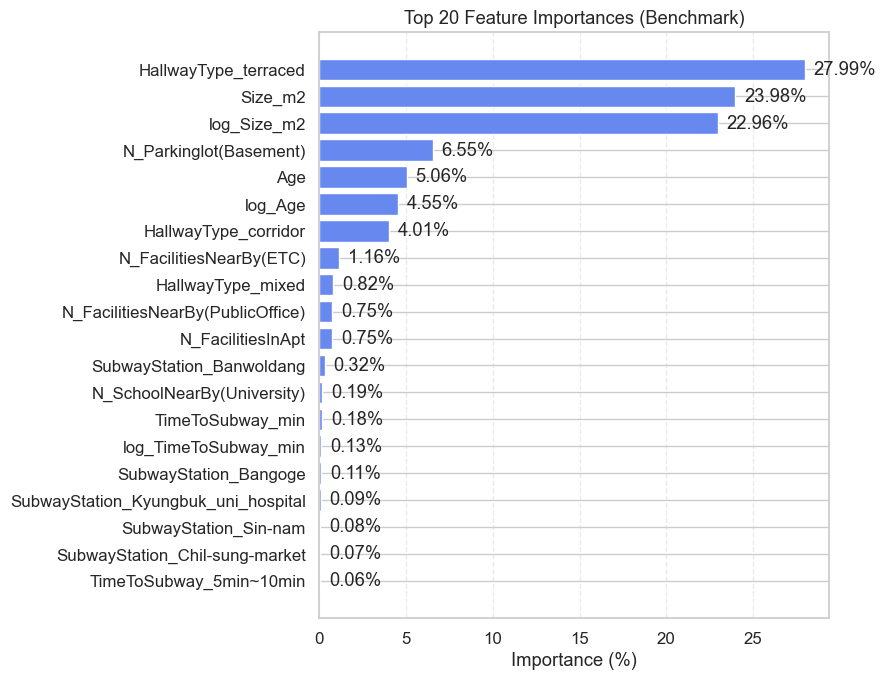

In [46]:
# visualisasi feature importances 

def plot_feature_importance(fi_df: pd.DataFrame, top_n: int = 20, title: str = "Top Feature Importances"):
    # Normalisasi ke persentase agar mudah dibaca
    fi = fi_df.copy()
    total = fi["importance"].sum()
    fi["pct"] = 100 * fi["importance"] / (total if total != 0 else 1.0)
    
    top = fi.head(top_n).iloc[::-1]  # balik untuk barh (terbaca dari atas ke bawah)
    top["cum_pct"] = top["pct"][::-1].cumsum()[::-1]  # akumulasi dari atas (opsional untuk ditampilkan di label)

    plt.figure(figsize=(9, max(4, top_n * 0.35)))
    bars = plt.barh(top["feature"], top["pct"])
    plt.xlabel("Importance (%)")
    plt.title(title)
    plt.grid(axis="x", linestyle="--", alpha=0.4)

    # Label persentase di ujung bar
    for b, v in zip(bars, top["pct"]):
        plt.text(b.get_width() + 0.5, b.get_y() + b.get_height()/2,
                 f"{v:.2f}%", va="center")

    plt.tight_layout()
    plt.show()

# === Pakai fungsi yang sudah kamu buat ===
fi_bench = feature_importance_df(best_pipe)  # pastikan best_pipe punya step "prep" & "model"
plot_feature_importance(fi_bench, top_n=20, title="Top 20 Feature Importances (Benchmark)")


Dari hasil feature importance pada model Random Forest, terlihat bahwa fitur paling berpengaruh terhadap harga apartemen adalah HallwayType_terraced, ukuran apartemen (Size_m2), dan log_Size_m2. Ini menunjukkan bahwa tipe lorong dan luas bangunan menjadi faktor utama dalam menentukan nilai jual.

Fitur lain seperti jumlah parkir basement dan umur bangunan juga memberikan kontribusi, meskipun lebih kecil.
Sebaliknya, faktor lokasi seperti jarak ke stasiun subway atau jumlah fasilitas di sekitar apartemen memiliki pengaruh yang relatif kecil terhadap harga.

Kesimpulannya, model ini menegaskan bahwa karakteristik fisik apartemen lebih menentukan harga jual dibandingkan faktor eksternal

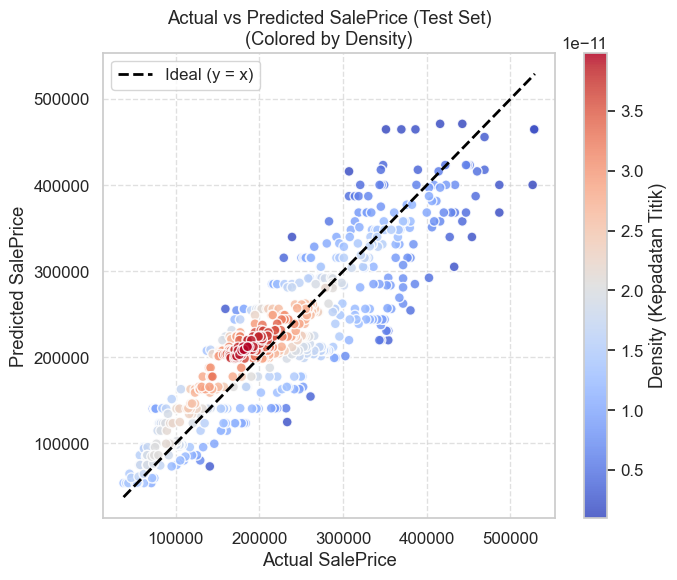

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Pastikan ke NumPy array (hindari KeyError dari indeks pandas)
y_true_np = np.asarray(y_true)
y_pred_np = np.asarray(y_pred)

# Hitung density
xy = np.vstack([y_true_np, y_pred_np])
z = gaussian_kde(xy)(xy)

# Urutkan agar titik padat (z rendah) digambar dulu, yang padat (z tinggi) di atas
idx = z.argsort()
yt_sorted = y_true_np[idx]
yp_sorted = y_pred_np[idx]
z_sorted = z[idx]

plt.figure(figsize=(7, 6))
sc = plt.scatter(yt_sorted, yp_sorted, c=z_sorted, cmap="coolwarm",
                 s=50, edgecolor="white", alpha=0.85)

# Garis ideal y=x
mn = float(min(yt_sorted.min(), yp_sorted.min()))
mx = float(max(yt_sorted.max(), yp_sorted.max()))
plt.plot([mn, mx], [mn, mx], 'k--', lw=2, label='Ideal (y = x)')

plt.title("Actual vs Predicted SalePrice (Test Set)\n(Colored by Density)")
plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
plt.legend()
cbar = plt.colorbar(sc); cbar.set_label("Density (Kepadatan Titik)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout(); plt.show()


Grafik ini menunjukkan seberapa akurat model memprediksi harga apartemen dibandingkan dengan nilai aslinya, sambil memberi informasi tambahan tentang kepadatan data (berapa banyak titik yang berada di area tertentu).
- X-axis: harga aktual apartemen (Actual SalePrice).
- Y-axis: harga hasil prediksi dari model (Predicted SalePrice).

makna warna :
- merah : Banyak apartemen di kisaran harga ini, model sering memprediksi di area tersebut (banyak data nyata dan akurat)
- putih/orange : Masih cukup banyak data, model cukup akurat
- biru : Data sedikit, model cenderung lebih sulit memprediksi dengan tepat.

Mayoritas titik mengikuti garis hitam (y = x)
artinya model sudah cukup akurat dalam memprediksi harga jual apartemen.
- Warna merah pekat muncul di kisaran harga 150.000–250.000
berarti sebagian besar data apartemen berada di kisaran harga tersebut (harga menengah).
model paling sering “belajar” dari area ini, sehingga prediksinya paling akurat di situ.
- Warna biru di bagian ekstrem (harga tinggi)
menandakan data di area itu lebih sedikit, sehingga model kurang “percaya diri” untuk prediksi di harga yang sangat tinggi.
ini hal yang normal dalam regresi: akurasi menurun di area dengan sedikit data


## Kesimpulan & Rekomendasi

### Kesimpulan Utama (EDA)


1. **Ukuran unit** (Size_m2) adalah pendorong harga terkuat (ρ ≈ 0.66). Apartemen lebih besar → harga lebih tinggi.
2. **Desain lorong** HallwayType_terraced berkorelasi positif kuat dengan harga (ρ ≈ 0.65). Tipe ini tampaknya dianggap premium (sirkulasi & privasi lebih baik).
3. **Fasilitas & parkir** berkontribusi positif: N_FacilitiesInApt dan N_Parkinglot(Basement) punya korelasi menengah-tinggi dengan harga.
4. **Usia bangunan** (Age) negatif cukup kuat (ρ ≈ -0.50): semakin tua → cenderung lebih murah.
5. **Akses transport**: Jarak ke subway (TimeToSubway_min) berkorelasi negatif (ρ ≈ -0.44), dan segmen 0–5 menit menunjukkan rata-rata harga tertinggi dan share penjualan terbesar. Stasiun tertentu (Banwoldang, Kyungbuk Uni Hospital) tampak sebagai lokasi premium (harga/penjualan tinggi).
6. **Segmentasi Stasiun × Waktu** menguatkan pola: dekat stasiun premium → harga tinggi.
(Contoh: 0–5 menit ke Banwoldang/Kyungbuk Uni Hospital punya Average Price paling tinggi pada tabulasi kamu.)

### Kesimpulan Pemodelan (ML)

1. **Kinerja Model** (Test Set)
- Benchmark: RandomForest ≈ RMSE 47.7k, MAE ≈ 38.2k, MAPE ≈ 18.8%
- Tuned XGB: ≈ RMSE 47.5k, MAE ≈ 38.0k, MAPE ≈ 18.7%
- → Peningkatan kecil tapi konsisten setelah tuning (sesuai tabelmu).
2. **Plot Actual vs Predicted** menampilkan pola regresi ke rata-rata:
- Underpredict di harga sangat tinggi, overpredict di harga sangat rendah → umum pada model regresi karena heteroskedastisitas dan keterbatasan fitur.
- Kepadatan titik terbesar di ~180–240k → ini “zona nyaman” model (paling banyak data).
3. **Feature importance (tree)** didominasi:
- HallwayType_terraced, Size_m2, log_Size_m2 → konsisten dengan EDA.
- Age, N_Parkinglot(Basement) ikut kuat.
- Fitur lokasi kategori seperti stasiun & time bands nampak kecil per-label, karena tersebar ke banyak dummy (satu-satu tampak kecil tapi total efek lokasi tetap berarti).
4. **Multikolinearitas (VIF)** tinggi pada beberapa kelompok fasilitas → menjelaskan kenapa linear regression kalah dari tree-based (pohon lebih tahan kolinearitas & non-linearitas).

**Kenapa EDA vs ML Bisa “Berbeda”?**
- Korelasi itu pasangan-fitur & linier.
- Importance model pohon itu kontribusi marginal setelah mempertimbangkan fitur lain, termasuk interaksi & non-linearitas.
- Kategori banyak level (stasiun) di-one-hot → importance per kolom kecil meski efek total lokasi nyata.
- Fitur saling terkait (VIF tinggi) membuat korelasi terlihat besar, tapi di model sebagian “diambil alih” fitur yang lebih informatif (mis. Size_m2 & HallwayType).

## Rekomendasi 

**Untuk Developer/Owner**
- Desain & spesifikasi: Prioritaskan hallway terraced dan basement parking; keduanya berkaitan dengan harga lebih tinggi.
- Unit mix: Sediakan porsi lebih besar untuk ukuran menengah–besar (elastisitas harga paling kuat).
- Lokasi & akses: Proyek ≤5 menit ke stasiun (terutama area premium seperti Banwoldang / Kyungbuk Uni Hospital) memiliki premium harga & penyerapan lebih baik.
- Strategi renovasi: Turunkan umur efektif (perbaikan/renovasi) untuk mengangkat harga pada stok lama.


**Untuk Calon Pembeli/Investor**
- Cari diskon alami pada unit tua / hallway mixed yang masih dekat subway → value for money.
- Hindari unit jauh dari subway kecuali ada kompensasi harga signifikan.

**Untuk Regulator/Perencana Kota**
- Investasi akses transport publik menambah nilai aset; prioritaskan konektivitas di koridor hunian padat.
- Dorong standar fasilitas internal minimum (parkir basement, fasilitas dalam apartemen) agar nilai kawasan naik merata.

**Rekomendasi Teknis (Peningkatan Model)**

1. **Fitur Lokasi Lebih Kuat**
- Tambahkan koordinat lat/long, jarak ke CBD, sekolah/universitas, mall, taman; lakukan Haversine distance.
- Coba target encoding untuk kategori dengan banyak level (stasiun) agar sinyal lokasi lebih terkonsentrasi.
2. **Algoritma & Tuning**
- Coba LightGBM / CatBoost (sangat bagus untuk kategori & interaksi).
- Gunakan early stopping dan optuna/bayesian search untuk hyperparameter.
3. **Validasi**
- Laporkan Train vs Test (kode di atas) + k-fold CV (sudah kamu lakukan).
- Tambahkan R² & Prediction Interval pada grafik untuk komunikasi ke bisnis.

**Kesimpulan:**

Analisis menunjukkan bahwa ukuran unit, tipe lorong terraced, ketersediaan parkir basement, dan kedekatan ke stasiun subway adalah pendorong utama harga apartemen di Daegu. Usia bangunan berpengaruh negatif. Model terbaik (XGBoost tuned) mencapai RMSE ≈ 47.5k dan MAPE ≈ 18.7% pada test set. Pola actual vs predicted mengindikasikan kecenderungan regresi ke rata-rata, khususnya pada rentang harga ekstrem, yang wajar mengingat keterbatasan fitur lokasi yang masih kasar.

**Rekomendasi:**

Bagi developer, fokus pada desain terraced hallway, parkir basement, dan akses ≤5 menit ke stasiun premium untuk memaksimalkan nilai. Bagi pembeli/investor, pertimbangkan unit lebih tua/hallway mixed di lokasi baik untuk memperoleh value. Secara teknis, perkuat fitur geospasial (jarak & koordinat), gunakan target encoding untuk kategori stasiun, dan pertimbangkan LightGBM/CatBoost serta quantile regression untuk memberikan rentang prediksi yang lebih informatif.

## Save Models

In [ ]:
import pickle
import os

ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# Simpan model dengan pickle
final_model_path = os.path.join(ARTIFACT_DIR, "final_model.pkl")
with open(final_model_path, "wb") as f:
    pickle.dump(best_tuned, f)

# Simpan metadata
meta = {
    "use_log_target": USE_LOG_TARGET,
    "random_state": RANDOM_STATE,
    "best_cv_model": best_name,
    "tuned_estimator": ("XGBRegressor" if HAVE_XGB else "GradientBoostingRegressor"),
    "test_metrics": {"RMSE": rmse1, "MAE": mae1, "MAPE": mape1},
}
meta_path = os.path.join(ARTIFACT_DIR, "metadata.json")
pd.Series(meta, dtype="object").to_json(meta_path, indent=2)

print(f"\nArtefak tersimpan:\n- {final_model_path}\n- {meta_path}")


In [48]:
# SIMPAN MODEL DENGAN PICKLE 
import pickle
import os

ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# Simpan model dengan pickle
final_model_path = os.path.join(ARTIFACT_DIR, "final_model.pkl")
with open(final_model_path, "wb") as f:
    pickle.dump(best_tuned, f)

# Simpan metadata
meta = {
    "use_log_target": USE_LOG_TARGET,
    "random_state": RANDOM_STATE,
    "best_cv_model": best_name,
    "tuned_estimator": ("XGBRegressor" if HAVE_XGB else "GradientBoostingRegressor"),
    "test_metrics": {"RMSE": rmse1, "MAE": mae1, "MAPE": mape1},
}
meta_path = os.path.join(ARTIFACT_DIR, "metadata.json")
pd.Series(meta, dtype="object").to_json(meta_path, indent=2)

print(f"\nArtefak tersimpan:\n- {final_model_path}\n- {meta_path}")



Artefak tersimpan:
- artifacts/final_model.pkl
- artifacts/metadata.json


Exception ignored in: <function ResourceTracker.__del__ at 0x10301dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107ee9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1077e9bc0>
Traceback (most recent call last

In [49]:
import os, pickle, json

print(os.path.exists("artifacts/final_model.pkl"))      # True
print(os.path.exists("artifacts/metadata.json"))        # True

with open("artifacts/final_model.pkl","rb") as f:
    _ = pickle.load(f)  # kalau lolos, aman ✅

True
True
